In [1]:
mean = [3.562, 11.73, 19.95, 28.03, 36.16, 46.1]
std_dev = [2.671, 4.052, 5.016, 5.844, 6.636, 8.597]

In [2]:
from scipy.optimize import curve_fit

In [3]:
N_ch = mean

In [4]:
W_ch = []
for i in range(0, len(mean)):
    W_ch.append((std_dev[i]**2)/mean[i])
print(W_ch)

[2.002875070185289, 1.3997190110826938, 1.2611657142857144, 1.218420834819836, 1.2178234513274337, 1.6032192841648587]


In [5]:
sigma_sq = []
for i in range(0, len(mean)):
    sigma_sq.append(std_dev[i]**2)
print(sigma_sq)

[7.134240999999999, 16.418703999999998, 25.160256, 34.152336000000005, 44.036496, 73.90840899999999]


In [6]:
# l = sigma_sq / mean_sq
l = []
for i in range(0, len(mean)):
    l.append(sigma_sq[i]/(N_ch[i]**2))
print(l)

[0.5622894638364091, 0.11932813393714353, 0.06321632653061225, 0.043468456468777596, 0.03367874588847992, 0.03477699097971494]


In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
n_par = [10, 30, 50, 70, 90, 110]
n_par = np.array(n_par)

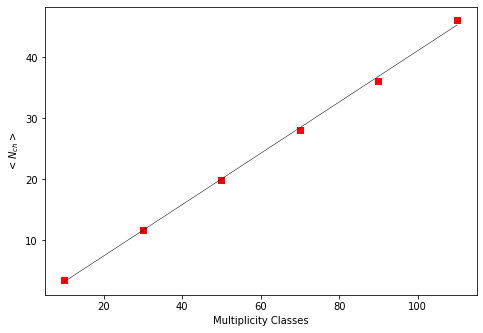

0.4200857142857142
-0.9498095238094951


In [9]:
m, b = np.polyfit(n_par, N_ch, 1)
fig = plt.figure()
plot = fig.add_axes([0,0,1,1])
plot.scatter(n_par, N_ch, marker = 's', color = 'red')
plot.plot(n_par, n_par*m + b, color = 'black', linewidth = 0.5)
plot.set_xlabel('Multiplicity Classes')
plot.set_ylabel(r'$<N_{ch}>$')
plt.show()
fig.savefig('plotN_ch.png', dpi=300, bbox_inches='tight')
print(m)
print(b)

[ 4.8547974   1.68980885 -3.74531106]


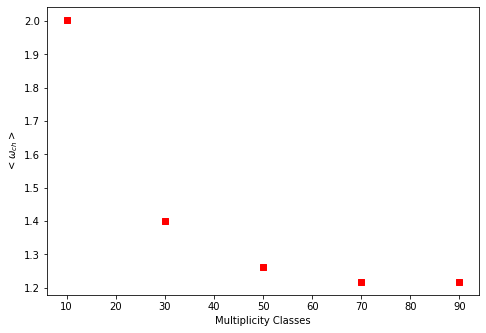

In [13]:
#m, b = np.polyfit(n_par, W_ch, 1)
def func(x, a, b, c):
    return a * np.exp(b / x) + c

x = n_par[0:-1]
y = func(x, 500, 10, 0.5)
yn = W_ch[0:-1]

popt, pcov = curve_fit(func, x, yn)
print(popt)
temp = np.linspace(10, 90, 500)
fig = plt.figure()
plot = fig.add_axes([0,0,1,1])
plot.scatter(n_par[0:-1], W_ch[0:-1], marker = 's', color = 'red')
#plot.plot(n_par, n_par*m + b, color = 'black', linewidth = 0.5)
#plot.plot(temp, func(temp, popt[0], popt[1], popt[2]), color = 'black', linewidth = 0.5)
plot.set_xlabel('Multiplicity Classes')
plot.set_ylabel(r'$<\omega_{ch}>$')
plt.show()
fig.savefig('plotW_ch_no_best_fit.png', dpi=300, bbox_inches='tight')

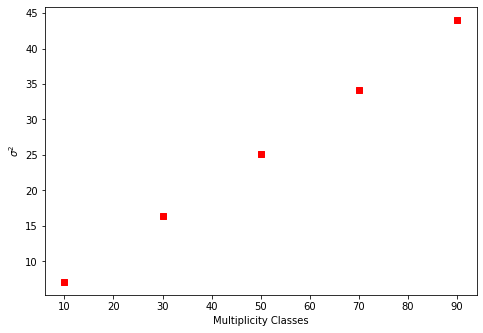

0.45769071000000006
2.4958710999999982


In [14]:
m, b = np.polyfit(n_par[0:-1], sigma_sq[0:-1], 1)
fig = plt.figure()
plot = fig.add_axes([0,0,1,1])
plot.scatter(n_par[0:-1], sigma_sq[0:-1], marker = 's', color = 'red')
#plot.plot(n_par[0:-1], n_par[0:-1]*m + b, color = 'black', linewidth = 0.5)
plot.set_xlabel('Multiplicity Classes')
plot.set_ylabel(r'$\sigma ^2$')
plt.show()
fig.savefig('plotsigma_sq_no_best_fit.png', dpi=300, bbox_inches='tight')

print(m)
print(b)

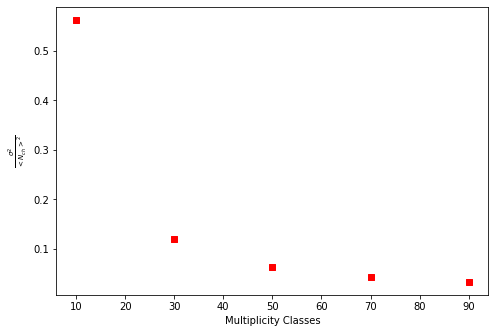

In [33]:
#m, b = np.polyfit(n_par, l, 1)
def func(x, a, b, c):
    return a * np.exp(b / x) + c

x = n_par
y = func(x, 500, 10, 0.5)
yn = l

popt, pcov = curve_fit(func, x, yn)
temp = np.linspace(10, 110, 500)
fig = plt.figure()
plot = fig.add_axes([0,0,1,1])
plot.scatter(n_par[0:-1], l[0:-1], marker = 's', color = 'red')
#plot.plot(temp, func(temp, popt[0], popt[1], popt[2]), color = 'black', linewidth = 0.5)
plot.set_xlabel('Multiplicity Classes')
plot.set_ylabel(r'$\frac{\sigma ^2}{<N_{ch}>^2}$')
plt.show()
fig.savefig('plotlast_one_no_best_fit.png', dpi=300, bbox_inches='tight')

In [35]:
n_par = np.array(mean)

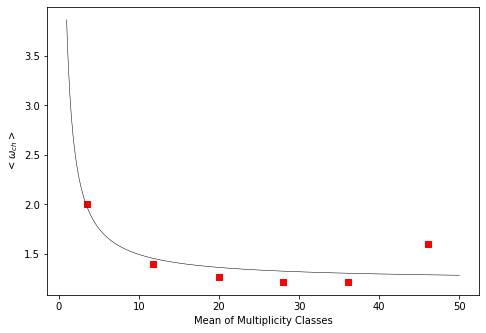

In [19]:
def func(x, a, b, c):
    return a * np.exp(-b/ x) + c

x = n_par
y = func(x, 500, 10, 0.5)
yn = W_ch

popt, pcov = curve_fit(func, x, yn)
#print(popt)
temp = np.linspace(1, 50, 500)
fig = plt.figure()
plot = fig.add_axes([0,0,1,1])
plot.scatter(n_par, W_ch, marker = 's', color = 'red')
#plot.plot(n_par, n_par*m + b, color = 'black', linewidth = 0.5)
plot.plot(temp, func(temp, popt[0], popt[1], popt[2]), color = 'black', linewidth = 0.5)
plot.set_xlabel('Mean of Multiplicity Classes')
plot.set_ylabel(r'$<\omega_{ch}>$')
plt.show()
fig.savefig('plotW_ch_mean.png', dpi=300, bbox_inches='tight')

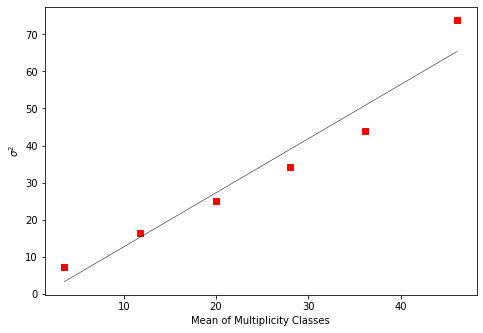

1.4602721841306228
-1.9509815834829396


In [20]:
m, b = np.polyfit(n_par, sigma_sq, 1)
fig = plt.figure()
plot = fig.add_axes([0,0,1,1])
plot.scatter(n_par, sigma_sq, marker = 's', color = 'red')
plot.plot(n_par, n_par*m + b, color = 'black', linewidth = 0.5)
plot.set_xlabel('Mean of Multiplicity Classes')
plot.set_ylabel(r'$\sigma ^2$')
plt.show()
fig.savefig('plotsigma_sq_mean.png', dpi=300, bbox_inches='tight')

print(m)
print(b)

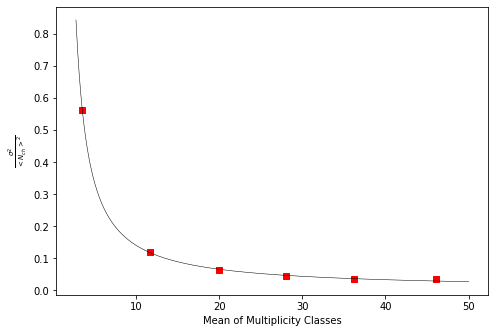

In [36]:
def func(x, a, b, c):
    return a * np.exp(b / x) + c

x = n_par
y = func(x, 500, 10, 0.5)
yn = l

popt, pcov = curve_fit(func, x, yn)
temp = np.linspace(2.8, 50, 500)
fig = plt.figure()
plot = fig.add_axes([0,0,1,1])
plot.scatter(n_par, l, marker = 's', color = 'red')
plot.plot(temp, func(temp, popt[0], popt[1], popt[2]), color = 'black', linewidth = 0.5)
plot.set_xlabel('Mean of Multiplicity Classes')
plot.set_ylabel(r'$\frac{\sigma ^2}{<N_{ch}>^2}$')
plt.show()
fig.savefig('plotlast_one_mean.png', dpi=300, bbox_inches='tight')

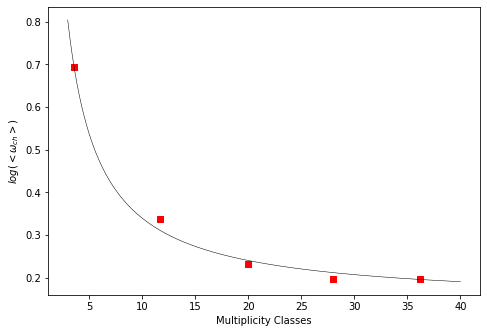

[1.98964418 0.14071596]


In [50]:
#log
n_par = np.array(mean)
def func(x, a, c):
    return a / x + c

x = n_par[0:-1]
y = func(x, 50, 0.5)
yn = np.log(W_ch[0:-1])

popt, pcov = curve_fit(func, x, yn)
n_par = np.array(mean)
temp = np.linspace(3, 40, 500)
fig = plt.figure()
plot = fig.add_axes([0,0,1,1])
plot.scatter(n_par[0:-1], np.log(W_ch[0:-1]), marker = 's', color = 'red')
#plot.scatter(n_par[0:-1], (W_ch[0:-1]), marker = 's', color = 'blue')
#plot.plot(n_par, n_par*m + b, color = 'black', linewidth = 0.5)
plot.plot(temp, func(temp, popt[0], popt[1]), color = 'black', linewidth = 0.5)
plot.set_xlabel('Multiplicity Classes')
plot.set_ylabel(r'$log(<\omega_{ch}>)$')
plt.show()
fig.savefig('plotW_ch_log.png', dpi=300, bbox_inches='tight')
print(popt)

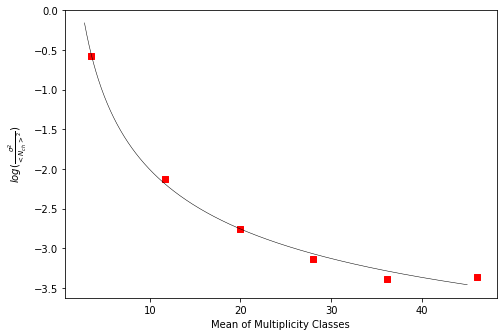

[ 7.99098667  0.29602045 -6.04954586]


In [49]:
n_par = np.array(mean)
def func(x, a, b, c):
    return a/(x**b) + c

x = n_par
y = func(x, 5, 10, 0.5)
yn = np.log(l)

popt, pcov = curve_fit(func, x, yn)
temp = np.linspace(2.8, 45, 500)
fig = plt.figure()
plot = fig.add_axes([0,0,1,1])
plot.scatter(n_par, np.log(l), marker = 's', color = 'red')
plot.plot(temp, func(temp, popt[0], popt[1], popt[2]), color = 'black', linewidth = 0.5)
plot.set_xlabel('Mean of Multiplicity Classes')
plot.set_ylabel(r'$log(\frac{\sigma ^2}{<N_{ch}>^2})$')
plt.show()
fig.savefig('plotlast_one_log.png', dpi=300, bbox_inches='tight')
print(popt)